# Web Scrapping With Python Libraries

In this project, I will use some Python libraries to scrape information from the Canada immigration website.

Using these libraries, I will fetch the information about visa approval rates for different countries between Jan 1, 2019 and Dec 31, 2021. The aim is to evaluate allegations of bias of the Canadian immigration officers against applicants from certain countries (mostly African countries).

This project is part of my Data Storytelling project as a data storytelling intern at Hamoye AI Labs.

### Questions to investigate:
1. Can one's country of residence impact the likelihood of success in a visa application?
2. How TRUE is the allegations of stereotype and bias of Canadian immigration officers towards applicants from some African countries [a.k.a the dirty 30]?


In [245]:
# import essential libraries
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import awoc   #module to fetch country information

In [199]:
path = 'tables'
if not os.path.exists(path):
    os.makedirs(path)
    
#     scrape tables from url
    url = "https://www.canada.ca/en/immigration-refugees-citizenship/corporate/transparency/committees/cimm-feb-15-17-2022/student-approval-rates.html"
    all_tables = pd.read_html(url)[:3]  #we're interested in just the first three tables
    start_yr = 2019
    count = 0
    while start_yr + count <= 2021:
        current_yr = start_yr + count
        table = all_tables[count]
        table['Year'] = current_yr
        table = table.to_csv(path + '/' + str(current_yr) + '.csv', index = False)
        count += 1

In [200]:
# Load dataframe for 2019
df_2019 = pd.read_csv(os.path.join(path, '2019.csv'), skiprows = [1]).rename(columns = {'2019 Total': 'Total'})
df_2019

,Country of Residence,Approved,Refused,Approval rate,Total,Year
0,Afghanistan,24.0,267.0,8%,291.0,2019
1,Albania,277.0,216.0,56%,493.0,2019
2,Algeria,2486.0,8449.0,23%,10935.0,2019
3,Andorra,3.0,1.0,75%,4.0,2019
4,Angola,23.0,84.0,21%,107.0,2019
...,...,...,...,...,...,...
239,Wallis And Futuna,NaN,NaN,NaN,NaN,2019
240,Western Sahara,NaN,1.0,0%,1.0,2019
241,"Yemen, Republic of",56.0,210.0,21%,266.0,2019
242,Zambia,59.0,87.0,40%,146.0,2019


In [201]:
# Load dataframe for 2020
df_2020 = pd.read_csv(os.path.join(path, '2020.csv'), skiprows = [1]).rename(columns = {'2020 Total': 'Total'})
df_2020

,Country of Residence,Approved,Refused,Approval rate,Total,Year
0,Afghanistan,10.0,115.0,8%,125.0,2020
1,Albania,110.0,283.0,28%,393.0,2020
2,Algeria,1417.0,8120.0,15%,9537.0,2020
3,Andorra,2.0,NaN,100%,2.0,2020
4,Angola,6.0,38.0,14%,44.0,2020
...,...,...,...,...,...,...
239,Wallis And Futuna,NaN,NaN,NaN,NaN,2020
240,Western Sahara,1.0,1.0,50%,2.0,2020
241,"Yemen, Republic of",34.0,102.0,25%,136.0,2020
242,Zambia,41.0,67.0,38%,108.0,2020


In [202]:
# Load dataframe for 2021
df_2021 = pd.read_csv(os.path.join(path, '2021.csv'), skiprows = [1]).rename(columns = {'2021 Total': 'Total'})
df_2021

,Country of Residence,Approved,Refused,Approval rate,Total,Year
0,Afghanistan,31.0,277.0,10%,308.0,2021
1,Albania,172.0,410.0,30%,582.0,2021
2,Algeria,2187.0,9288.0,19%,11475.0,2021
3,Andorra,9.0,2.0,82%,11.0,2021
4,Angola,26.0,44.0,37%,70.0,2021
...,...,...,...,...,...,...
239,Wallis And Futuna,1.0,NaN,100%,1.0,2021
240,Western Sahara,NaN,NaN,NaN,NaN,2021
241,"Yemen, Republic of",36.0,165.0,18%,201.0,2021
242,Zambia,79.0,83.0,49%,162.0,2021


In [203]:
# Merge all three tables
df = pd.concat([df_2019, df_2020, df_2021], ignore_index = True)
df

,Country of Residence,Approved,Refused,Approval rate,Total,Year
0,Afghanistan,24.0,267.0,8%,291.0,2019
1,Albania,277.0,216.0,56%,493.0,2019
2,Algeria,2486.0,8449.0,23%,10935.0,2019
3,Andorra,3.0,1.0,75%,4.0,2019
4,Angola,23.0,84.0,21%,107.0,2019
...,...,...,...,...,...,...
727,Wallis And Futuna,1.0,NaN,100%,1.0,2021
728,Western Sahara,NaN,NaN,NaN,NaN,2021
729,"Yemen, Republic of",36.0,165.0,18%,201.0,2021
730,Zambia,79.0,83.0,49%,162.0,2021


### Data Quality Issues
- Columns are in wrong datatype
- String values in 'Approval rate' column
- Null values in columns

In [204]:
# Replace null values with 0 across columns listed below
col_list = ['Approved', 'Refused', 'Total']
df[col_list] = df[col_list].fillna(0)

In [205]:
# Explorre dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Residence  732 non-null    object 
 1   Approved              732 non-null    float64
 2   Refused               732 non-null    float64
 3   Approval rate         688 non-null    object 
 4   Total                 732 non-null    float64
 5   Year                  732 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 34.4+ KB


In [206]:
# remove % sign from 'Approval rate' column
df['Approval rate'] = df['Approval rate'].str.replace('%', '')

# convert to float data type and fill up null values with 0 
df['Approval rate'] = df['Approval rate'].astype('float64').fillna(0)
df['Approval rate']

0        8.0
1       56.0
2       23.0
3       75.0
4       21.0
       ...  
727    100.0
728      0.0
729     18.0
730     49.0
731     49.0
Name: Approval rate, Length: 732, dtype: float64

In [207]:
# Change column datatypes
dtype_mapper = {
    'Country of Residence': 'category',
    'Approved': 'int64',
    'Refused': 'int64',
    'Total': 'int64',
}
df = df.astype(dtype_mapper)

# convert Year column to datetime
df['Year'] = pd.to_datetime(df['Year'], yearfirst=True, format='%Y')

In [208]:
df.head()

,Country of Residence,Approved,Refused,Approval rate,Total,Year
0,Afghanistan,24,267,8.0,291,2019-01-01
1,Albania,277,216,56.0,493,2019-01-01
2,Algeria,2486,8449,23.0,10935,2019-01-01
3,Andorra,3,1,75.0,4,2019-01-01
4,Angola,23,84,21.0,107,2019-01-01


### Fetch additional data about countries

In [209]:
world_countries = awoc.AWOC()
countries_info = world_countries.get_countries()
countries_info

[{'Country Name': 'Afghanistan',
  'ISO2': 'AF',
  'ISO3': 'AFG',
  'TLD': 'af',
  'FIPS': 'AF',
  'ISO Numeric': '004',
  'GeoNameID': '1149361',
  'E164': '93',
  'Phone Code': '93',
  'Continent Name': 'Asia',
  'Continent Code': 'as',
  'Capital': 'Kabul',
  'Time Zone in Capital': 'Asia/Kabul',
  'Currency Name': 'Afghani',
  'Languages': 'Afghan Persian or Dari (official) 50%, Pashto (official) 35%, Turkic languages (primarily Uzbek and Turkmen) 11%, 30 minor languages (primarily Balochi and Pashai) 4%, much bilingualism, but Dari functions as the lingua franca',
  'Area KM2': '647500'},
 {'Country Name': 'Albania',
  'ISO2': 'AL',
  'ISO3': 'ALB',
  'TLD': 'al',
  'FIPS': 'AL',
  'ISO Numeric': '008',
  'GeoNameID': '783754',
  'E164': '355',
  'Phone Code': '355',
  'Continent Name': 'Europe',
  'Continent Code': 'eu',
  'Capital': 'Tirana',
  'Time Zone in Capital': 'Europe/Tirane',
  'Currency Name': 'Lek',
  'Languages': 'Albanian 98.8% (official - derived from Tosk dialect)

In [210]:
# Convert country_info json to Pandas data frame
# and extract only columns of interest

df_countries = pd.DataFrame(countries_info)[['Country Name', 'Continent Name', 'GeoNameID']]
df_countries

,Country Name,Continent Name,GeoNameID
0,Afghanistan,Asia,1149361
1,Albania,Europe,783754
2,Algeria,Africa,2589581
3,American Samoa,Oceania,5880801
4,Andorra,Europe,3041565
...,...,...,...
235,Wallis and Futuna,Oceania,4034749
236,Western Sahara,Africa,2461445
237,Yemen,Asia,69543
238,Zambia,Africa,895949


### Perform minor cleaning before merging tables

Country names in the two tables are sometimes represented in different ways
e.g United States vs United States of America, etc

In [211]:
missing_countries = set(df['Country of Residence']) - set(df_countries['Country Name'])
missing_countries

{'Azores',
 'Bahama Islands, The',
 'Bailwick of Jersey',
 'Bonaire, Sin Eustatius And Saba',
 'Bosnia-Hercegovina',
 'Botswana, Republic of',
 'Bouvet Island',
 'Burkina-Faso',
 'Canary Islands',
 'Cape Verde Islands',
 'Chad, Republic of',
 'Channel Islands',
 'Commonwealth of the Northern Mariana Islands',
 'Congo, Democratic Republic of the',
 "Congo, People's Republic of the",
 'Czechoslovakia',
 'Democratic Republic of Sudan',
 'East Timor, Democratic Republic of',
 'Federal Republic of Cameroon',
 'Federal Republic of Germany',
 'Federated States of Micronesia',
 'French Guiana',
 'Gabon Republic',
 'Guadeloupe',
 'Guinea, Republic of',
 'Holy See',
 'Hong Kong SAR',
 "Korea, People's Democratic Republic of",
 'Korea, Republic of',
 'Kosovo, Republic of',
 'Macao SAR',
 'Madeira',
 'Maldives, Republic of',
 'Mali, Republic of',
 'Martinique',
 "Mongolia, People's Republic of",
 'Montenegro, Republic of',
 'Myanmar (Burma)',
 'Other Countries',
 'Palestinian Authority (Gaza/West 

In [212]:
unmatched_2 = set(df_countries['Country Name']) - set(df['Country of Residence'])
unmatched_2

{'American Samoa',
 'Antarctica',
 'Bahamas',
 'Benin',
 'Bosnia and Herzegovina',
 'Botswana',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Burkina Faso',
 'Cameroon',
 'Cape Verde',
 'Chad',
 'China',
 'Cocos Islands',
 'Democratic Republic of the Congo',
 'Djibouti',
 'East Timor',
 'Gabon',
 'Germany',
 'Guinea',
 'Hong Kong',
 'Indonesia',
 'Ireland',
 'Ivory Coast',
 'Jersey',
 'Kosovo',
 'Macau',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Micronesia',
 'Mongolia',
 'Montenegro',
 'Montserrat',
 'Myanmar',
 'Nauru',
 'Netherlands',
 'Netherlands Antilles',
 'Niger',
 'North Korea',
 'Northern Mariana Islands',
 'Palau',
 'Palestine',
 'Panama',
 'Papua New Guinea',
 'Pitcairn',
 'Republic of the Congo',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Serbia',
 'Sint Maarten',
 'Slovakia',
 'Solomon Islands',
 'Somalia',
 'South Afric

In [213]:
# I have manually modified the country names such that where possible, the ones coming from the library and the one coming from the dataset 
# correspond.

modified_country_names = pd.read_csv('modified_country_names.csv')
modified_country_names

,from_df,from_lib
0,Tadjikistan,Tajikistan
1,Bonaire,NaN
2,Serbia and Montenegro,NaN
3,Republic of Indonesia,Indonesia
4,St. Kitts-Nevis,Saint Kitts and Nevis
...,...,...
59,Myanmar,Myanmar
60,St. Lucia,Saint Lucia
61,Democratic Republic of Sudan,Sudan
62,Solomons,NaN


In [214]:
df_copy = df.copy()

# List of countries to be modified
countries_to_replace = modified_country_names['from_df'].tolist()

# List of modified country names
replacements = modified_country_names['from_lib'].tolist()

# Next, convert the two lists into a dictionary
rep_mapper = {countries_to_replace[i] : replacements[i] for i in range(len(countries_to_replace))}
rep_mapper

{'Tadjikistan': 'Tajikistan',
 'Bonaire': nan,
 'Serbia and Montenegro': nan,
 'Republic of Indonesia': 'Indonesia',
 'St. Kitts-Nevis': 'Saint Kitts and Nevis',
 'Socialist Republic of Vietnam': 'Vietnam',
 'Republic of The Marshall Islands': 'Marshall Islands',
 'United States of America': 'United States',
 'Cape Verde Islands': 'Cape Verde',
 'Republic of Ivory Coast': 'Ivory Coast',
 'The Netherlands': 'Netherlands',
 'Guadeloupe': nan,
 'Republic of Djibouti': 'Djibouti',
 'Wallis And Futuna': 'Wallis and Futuna',
 'The Netherlands Antilles': 'Netherlands Antilles',
 'Republic of the Niger': 'Niger',
 'Commonwealth of the Northern Mariana Islands': 'Northern Mariana Islands',
 'Korea': nan,
 'French Guiana': nan,
 'Tibet': nan,
 'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
 'Sint-Maarten': 'Sint Maarten',
 'Macao SAR': 'Macau',
 'United Kingdom and Overseas Territories': 'United Kingdom',
 'Surinam': 'Suriname',
 'Saint-Barthelemy': 'Saint Barthelemy',
 'B

In [215]:
# Next, apply the replacements on the main dataframe
df_copy['Country of Residence'] = df_copy['Country of Residence'].astype('str').replace(rep_mapper)
df_copy['Country of Residence'].unique() #.tolist()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', nan, 'Bahama Islands, The',
       'Bahrain', 'Jersey', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sin Eustatius And Saba', 'Bosnia and Herzegovina',
       'Botswana, Republic of', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad, Republic of',
       'Chile', 'Christmas Island', 'Colombia',
       'Northern Mariana Islands', 'Comoros',
       'Congo, Democratic Republic of the',
       "Congo, People's Republic of the", 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Sudan',
       'Denmark', 'Dominica', 'Dominican Republic',
       'East Timor, Democratic Republic of', 'Ecua

In [216]:
# Extract just the country name without any parentheses
df_copy['Country of Residence'] = df_copy['Country of Residence'].replace('Republic of ', '')
df_copy['Country of Residence'] = df_copy['Country of Residence'].astype('str').apply(lambda x: re.sub(r"\(.*\)", "", x))
df_copy['Country of Residence'] = df_copy['Country of Residence'].astype('str').apply(lambda x: x.split(",")[0]).str.rstrip()

In [217]:
sorted(df_copy['Country of Residence'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahama Islands',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 '

In [218]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country of Residence  732 non-null    object        
 1   Approved              732 non-null    int64         
 2   Refused               732 non-null    int64         
 3   Approval rate         732 non-null    float64       
 4   Total                 732 non-null    int64         
 5   Year                  732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 34.4+ KB


In [219]:
# replace missing country names with Other Countries
df_copy['Country of Residence'].fillna('Other Countries', inplace=True)
sorted(df_copy['Country of Residence'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahama Islands',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 '

In [220]:
df_copy['Country of Residence'].sample(30)

311                     Estonia
574                     Grenada
284                        Chad
230                    Tanzania
561                  Micronesia
633                  Mozambique
38               Cayman Islands
165                 Philippines
108                      Jordan
630                    Mongolia
459                    Thailand
654                    Pitcairn
111                    Kiribati
128                  Madagascar
488                 Afghanistan
579                      Guinea
121                     Liberia
279                      Canada
86                      Grenada
174                 Ivory Coast
63                        Egypt
301                       Sudan
190                      Serbia
468                Turkmenistan
176                South Africa
533    Northern Mariana Islands
84                       Greece
324                      Gambia
212                       Syria
333                   Guatemala
Name: Country of Residence, dtype: objec

In [221]:
# Let us extract the continent of each country from the df_countries dataframe
# and add it to our fact table

df_copy = pd.merge(df_copy, df_countries, left_on = 'Country of Residence', right_on = 'Country Name', how='left').drop(columns=['Country Name'])
df_copy

,Country of Residence,Approved,Refused,Approval rate,Total,Year,Continent Name,GeoNameID
0,Afghanistan,24,267,8.0,291,2019-01-01,Asia,1149361
1,Albania,277,216,56.0,493,2019-01-01,Europe,783754
2,Algeria,2486,8449,23.0,10935,2019-01-01,Africa,2589581
3,Andorra,3,1,75.0,4,2019-01-01,Europe,3041565
4,Angola,23,84,21.0,107,2019-01-01,Africa,3351879
...,...,...,...,...,...,...,...,...
727,Wallis and Futuna,1,0,100.0,1,2021-01-01,Oceania,4034749
728,Western Sahara,0,0,0.0,0,2021-01-01,Africa,2461445
729,Yemen,36,165,18.0,201,2021-01-01,Asia,69543
730,Zambia,79,83,49.0,162,2021-01-01,Africa,895949


In [222]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country of Residence  732 non-null    object        
 1   Approved              732 non-null    int64         
 2   Refused               732 non-null    int64         
 3   Approval rate         732 non-null    float64       
 4   Total                 732 non-null    int64         
 5   Year                  732 non-null    datetime64[ns]
 6   Continent Name        651 non-null    object        
 7   GeoNameID             651 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 51.5+ KB


In [223]:
# Convert 'Continent Name' to categorical data type
df_copy['Continent Name'] = df_copy['Continent Name'].astype('category')

## Exploratory Analysis

In [224]:
# Define helpful functions

def compute_percentage(fig, df, col):
    """ Function to compute percentages of each bar to the total observations in a category"""
    total = df[col].sum()
    for p in fig.patches:
        percentage = "{:.1f}%".format(100*p.get_height()/total)
        y = p.get_height() - 0.15
        x = (p.get_x() + p.get_width()) - 0.2
        fig.annotate(percentage, (x,y), ha='center')

### Where did most applications coming from?

In [227]:
# Distribution of applications by country of residence of the applicant
bar_data = df_copy.groupby('Country of Residence')['Total'].sum()
bar_data.reset_index()

,Country of Residence,Total
0,Afghanistan,724
1,Albania,1468
2,Algeria,31947
3,Andorra,17
4,Angola,221
...,...,...
221,Western Sahara,3
222,Yemen,603
223,Zambia,416
224,Zimbabwe,1532


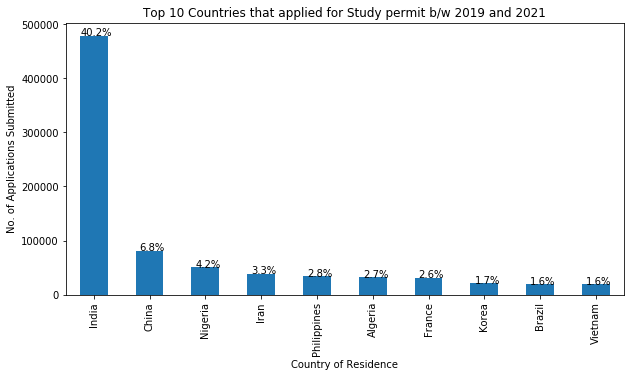

In [231]:
top_10 = bar_data.nlargest(10)
plt.figure(figsize=[10, 5])
fig_period = top_10.plot(kind='bar', stacked=False);
plt.xlabel("Country of Residence")
plt.ylabel("No. of Applications Submitted")
plt.title('Top 10 Countries that applied for Study permit b/w 2019 and 2021');
compute_percentage(fig_period, df_copy, col='Total')
# plt.legend(title = 'Application Status');

- 67.5% of applications for study permit came from these 15 countries.
- The remaining 32.5% was contributed by 216 other countries.
- India was by far ahead of other countries, and contributed 40.2% of all applications for Canadian study permit between Jan 1, 2019 and Dec 31, 2021.
- China and Nigeria come second and third respectively

In [251]:
# Distribution of applications by country of residence of the applicant
bar_data = df_copy.groupby('Country of Residence')['Total', 'Approved'].sum()
top_10_approved = bar_data.nlargest(10, 'Total')
top_10_approved.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country of Residence,Total,Approved
0,India,478540,283641
1,China,81173,67980
2,Nigeria,50475,12220
3,Iran,38815,16380
4,Philippines,33607,20697
5,Algeria,31947,6090
6,France,31372,29324
7,Korea,20745,19844
8,Brazil,19357,15383
9,Vietnam,19278,10940


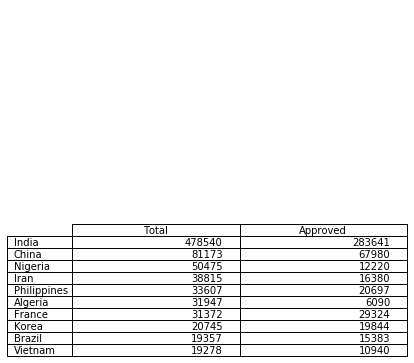

In [252]:
ax = plt.subplot(111, frame_on = False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, top_10_approved)
# plt.savefig('approvalrate.png')

<Figure size 720x360 with 0 Axes>

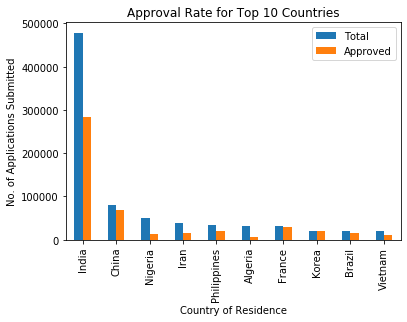

In [242]:
plt.figure(figsize=[10, 5])
fig_period = top_10_approved.plot(kind='bar', stacked=False);
plt.xlabel("Country of Residence")
plt.ylabel("No. of Applications Submitted")
plt.title('Approval Rate for Top 10 Countries');
# compute_percentage(fig_period, df_copy, col='Total')

### Distribution of approved submissions by country

In [182]:
# Year 2019
applications_2019 = df_copy[df_copy['Year'] == '2019']
applications_2019

,Country of Residence,Approved,Refused,Approval rate,Total,Year,Continent Name,GeoNameID
0,Afghanistan,24,267,8.0,291,2019-01-01,Asia,1149361
1,Albania,277,216,56.0,493,2019-01-01,Europe,783754
2,Algeria,2486,8449,23.0,10935,2019-01-01,Africa,2589581
3,Andorra,3,1,75.0,4,2019-01-01,Europe,3041565
4,Angola,23,84,21.0,107,2019-01-01,Africa,3351879
...,...,...,...,...,...,...,...,...
239,Wallis and Futuna,0,0,0.0,0,2019-01-01,Oceania,4034749
240,Western Sahara,0,1,0.0,1,2019-01-01,Africa,2461445
241,Yemen,56,210,21.0,266,2019-01-01,Asia,69543
242,Zambia,59,87,40.0,146,2019-01-01,Africa,895949


In [183]:
# distribution of applications by Country of Residence of applicants in 2019

# Top 10 source Countries in 2019
top_10_2019 = applications_2019.nlargest(10, 'Total')
top_10_2019[['Country of Residence', 'Approved', 'Refused', 'Approval rate', 'Total']]

,Country of Residence,Approved,Refused,Approval rate,Total
100,India,110049,62976,64.0,173025
163,China,29441,5299,85.0,34740
152,Nigeria,3155,14933,17.0,18088
101,Iran,6177,7969,44.0,14146
2,Algeria,2486,8449,23.0,10935
197,Vietnam,5163,5395,49.0,10558
76,France,9529,736,93.0,10265
113,Korea,9219,479,95.0,9698
165,Philippines,5168,3207,62.0,8375
29,Brazil,6878,1375,83.0,8253


For the year 2019, Nigeria ranked 3rd country with the highest number of applicants after China and India.

In [184]:
bar_data = top_10_2019.groupby('Country of Residence')[['Approved', 'Refused']].sum()
bar_data.reset_index()

,Country of Residence,Approved,Refused
0,Algeria,2486,8449
1,Brazil,6878,1375
2,China,29441,5299
3,France,9529,736
4,India,110049,62976
5,Iran,6177,7969
6,Korea,9219,479
7,Nigeria,3155,14933
8,Philippines,5168,3207
9,Vietnam,5163,5395


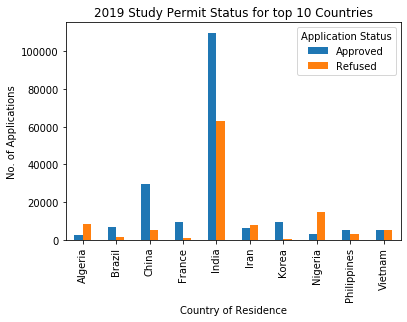

In [185]:
fig_2019 = bar_data.plot(kind='bar', stacked=False);
plt.xlabel("Country of Residence")
plt.ylabel("No. of Applications")
plt.title('2019 Study Permit Status for top 10 Countries')
plt.legend(title = 'Application Status');

For the top 10 countries, Nigeria recorded the highest application rejection rate than any other country.
Nigeria is closely followed by Algeria, then Iran.

On the contrary, India recorded more approved applications han rejected ones for the same year.

### But will this change in 2020?

In [186]:
# Table for Year 2020
applications_2020 = df_copy[df_copy['Year'] == '2020']
applications_2020

,Country of Residence,Approved,Refused,Approval rate,Total,Year,Continent Name,GeoNameID
244,Afghanistan,10,115,8.0,125,2020-01-01,Asia,1149361
245,Albania,110,283,28.0,393,2020-01-01,Europe,783754
246,Algeria,1417,8120,15.0,9537,2020-01-01,Africa,2589581
247,Andorra,2,0,100.0,2,2020-01-01,Europe,3041565
248,Angola,6,38,14.0,44,2020-01-01,Africa,3351879
...,...,...,...,...,...,...,...,...
483,Wallis and Futuna,0,0,0.0,0,2020-01-01,Oceania,4034749
484,Western Sahara,1,1,50.0,2,2020-01-01,Africa,2461445
485,Yemen,34,102,25.0,136,2020-01-01,Asia,69543
486,Zambia,41,67,38.0,108,2020-01-01,Africa,895949


In [187]:
# distribution of applications by Country of Residence of applicants in 2020
# Top 10 source Countries in 2020

top_10_2020 = applications_2020.nlargest(10, 'Total')
top_10_2020[['Country of Residence', 'Approved', 'Refused', 'Approval rate', 'Total']]

,Country of Residence,Approved,Refused,Approval rate,Total
344,India,36057,38598,48.0,74655
407,China,9737,2288,81.0,12025
396,Nigeria,2073,9490,18.0,11563
246,Algeria,1417,8120,15.0,9537
345,Iran,3774,4430,46.0,8204
320,France,6097,131,98.0,6228
409,Philippines,2594,2547,50.0,5141
357,Korea,4589,146,97.0,4735
261,Bangladesh,1478,2476,37.0,3954
441,Vietnam,2372,1485,61.0,3857


In [188]:
bar_data = top_10_2020.groupby('Country of Residence')[['Approved', 'Refused']].sum()
bar_data.reset_index()

,Country of Residence,Approved,Refused
0,Algeria,1417,8120
1,Bangladesh,1478,2476
2,China,9737,2288
3,France,6097,131
4,India,36057,38598
5,Iran,3774,4430
6,Korea,4589,146
7,Nigeria,2073,9490
8,Philippines,2594,2547
9,Vietnam,2372,1485


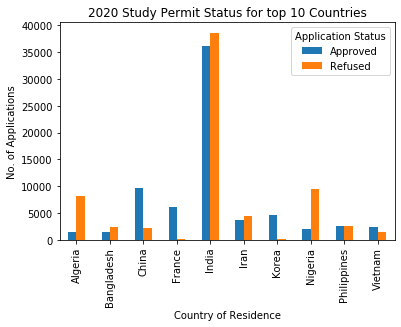

In [189]:
fig_2020 = bar_data.plot(kind='bar', stacked=False);
plt.xlabel("Country of Residence")
plt.ylabel("No. of Applications")
plt.title('2020 Study Permit Status for top 10 Countries')
plt.legend(title = 'Application Status');

For year 2020, Nigeria and Algeria still recorded the highest rejection rates, followed by Iran and Bangladesh.
The trend did not changed much as India and China still recorded the highest approval rates.

### Let us look at the year 2021 to see if this trend will persist

In [190]:
# Table for Year 2020
applications_2021 = df_copy[df_copy['Year'] == '2021']
applications_2021

,Country of Residence,Approved,Refused,Approval rate,Total,Year,Continent Name,GeoNameID
488,Afghanistan,31,277,10.0,308,2021-01-01,Asia,1149361
489,Albania,172,410,30.0,582,2021-01-01,Europe,783754
490,Algeria,2187,9288,19.0,11475,2021-01-01,Africa,2589581
491,Andorra,9,2,82.0,11,2021-01-01,Europe,3041565
492,Angola,26,44,37.0,70,2021-01-01,Africa,3351879
...,...,...,...,...,...,...,...,...
727,Wallis and Futuna,1,0,100.0,1,2021-01-01,Oceania,4034749
728,Western Sahara,0,0,0.0,0,2021-01-01,Africa,2461445
729,Yemen,36,165,18.0,201,2021-01-01,Asia,69543
730,Zambia,79,83,49.0,162,2021-01-01,Africa,895949


In [191]:
# distribution of applications by Country of Residence of applicants in 2020
# Top 10 source Countries in 2020

top_10_2021 = applications_2021.nlargest(10, 'Total')
top_10_2021[['Country of Residence', 'Approved', 'Refused', 'Approval rate', 'Total']]

,Country of Residence,Approved,Refused,Approval rate,Total
588,India,137535,93325,60.0,230860
651,China,28802,5606,84.0,34408
640,Nigeria,6992,13832,34.0,20824
653,Philippines,12935,7156,64.0,20091
589,Iran,6429,10036,39.0,16465
564,France,13698,1181,92.0,14879
490,Algeria,2187,9288,19.0,11475
532,Colombia,6241,3846,62.0,10087
627,Mexico,8700,1282,87.0,9982
517,Brazil,7142,1744,80.0,8886


In [192]:
bar_data = top_10_2021.groupby('Country of Residence')[['Approved', 'Refused']].sum()
bar_data.reset_index()

,Country of Residence,Approved,Refused
0,Algeria,2187,9288
1,Brazil,7142,1744
2,China,28802,5606
3,Colombia,6241,3846
4,France,13698,1181
5,India,137535,93325
6,Iran,6429,10036
7,Mexico,8700,1282
8,Nigeria,6992,13832
9,Philippines,12935,7156


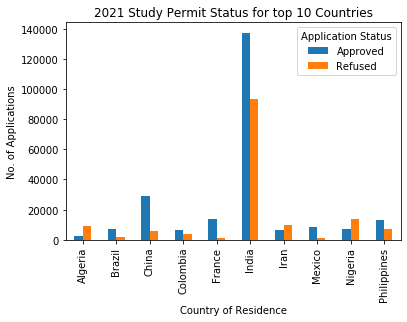

In [193]:
fig_2021 = bar_data.plot(kind='bar', stacked=False);
plt.xlabel("Country of Residence")
plt.ylabel("No. of Applications")
plt.title('2021 Study Permit Status for top 10 Countries')
plt.legend(title = 'Application Status');

The trend did not change still.
Countries like China and India still topped the list, while Nigeria, Algeria and Iran continued to record the highest rejection rate.

### With the statistical evidence before us, one might be moved to ask:
1. Why has Nigeria consistently recorded the lowest study permit approval rate when compared with other top countries?


In [253]:
# Distribution of approved applications by continent for the top 10 countries in 2019
fig_data_2019 = top_10_2019.groupby('Continent Name')['Approved'].sum()
fig_data_2019

Continent Name
Africa             5641
Asia             155998
Europe             9529
North America         0
Oceania               0
South America      6878
Name: Approved, dtype: int64

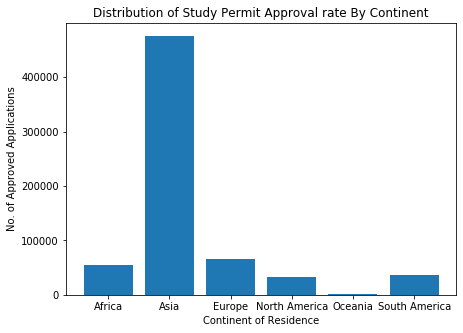

In [256]:
fig = plt.figure(figsize=[7,5])
x = df_copy.groupby(['Continent Name'])['Approved'].sum()
plt.bar(x.index, x.values);
plt.xlabel("Continent of Residence")
plt.ylabel("No. of Approved Applications")
plt.title('Distribution of Study Permit Approval rate By Continent');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x360 with 0 Axes>

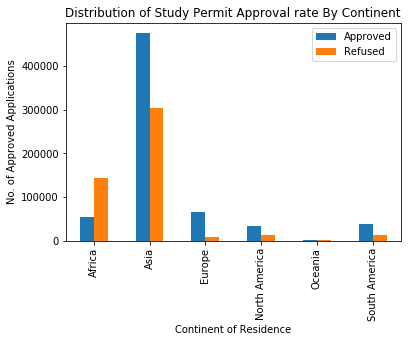

In [260]:
# Compare Approval rate to number of applications from eacv continent
fig = plt.figure(figsize=[7,5])
x = df_copy.groupby(['Continent Name'])['Approved', 'Refused'].sum()
x.plot(kind="bar", stacked=False)
plt.xlabel("Continent of Residence")
plt.ylabel("No. of Approved Applications")
plt.title('Distribution of Study Permit Approval rate By Continent');

In [77]:
df_copy['Year'].sample(10)

65     1970
183    1970
296    1970
128    1970
516    1970
331    1970
513    1970
269    1970
706    1970
656    1970
Name: Year, dtype: int64

Most approved applications between 2019 and 2021 came from Asia